In [31]:
# 激活函数
def sigmoid(z):
    """
    sigmoid激活函数
    :param z: 输入
    :return: sigmoid(z)
    """
    return 1/(1 + np.exp(-z))

In [32]:
# 设置初始化参数
def initialize_parameters(in_n, h_n, out_n):
    """
    初始化权重和偏置
    in_n -- 输入层节点数
    h_n -- 隐藏层节点数
    out_n -- 输出层结点数
    returns:
    params --
              W1 --  权重矩阵，维度为(h_n, in_n)
              b1 -- 偏置向量，维度为(h_n, 1)
              W2 -- 权重矩阵，维度为 (out_n, h_n)
              b2 -- 偏置向量，维度为 (out_n, 1)
    """
    W1 = np.random.randn(h_n, in_n) * 0.01
    b1 = np.zeros((h_n, 1))
    W2 = np.random.randn(out_n, h_n) * 0.01
    b2 = np.zeros((out_n, 1))
 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
 
    return parameters

In [33]:
BP算法
def forward_propagation(X, parameters):
    """
    前向传播
    X -- 输入数据
    parameters -- 参数（包含W1,b1,W2,b2）
    returns:
    A2 -- 网络输出
    temp -- 包含 Z1, A1, Z2，A2的字典，用于BP算法
    """
 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
 
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
 
    temp = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2,temp

In [34]:
def backward_propagation(parameters, temp, X, Y):
    """
    反向传播
    parameters -- 参数（包含W1,b1,W2,b2）
    temp -- 包含 Z1, A1, Z2，A2的字典，用于BP算法
    X -- 输入数据
    Y -- 输入数据标签
    returns:
    grads -- 返回不同参数的梯度
    cost -- 损失函数
    """
    # 取回参数
    W1 = parameters["W1"]
    W2 = parameters["W2"]
 
    A1 = temp["A1"]
    A2 = temp["A2"]
 
    # 样本数目
    num = Y.shape[0]
    # 交叉熵损失函数
    cost = -1 / num * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
 
    # 反向传播
    dZ2 = A2 - Y
    dW2 = 1 / num * np.dot(dZ2, A1.T)
    db2 = 1 / num * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1 / num * np.dot(dZ1, X.T)
    db1 = 1 / num * np.sum(dZ1, axis=1, keepdims=True)
 
 
    gradients = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
 
    return cost,gradients

In [35]:
# 参数更新
def update_parameters(parameters, gradients, learning_rate):
    """
    梯度下降法更新参数
    parameters -- 参数（包含W1,b1,W2,b2）
    grads -- 不同参数的梯度
    returns:
    parameters -- 更新后的参数
    """
    #取回参数
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
 
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
 
    # 更新参数
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
 
    return parameters

In [36]:
# 预测
def predict(parameters, X):
    """
    使用学习好的参数来预测
    parameters -- 学习好的参数
    X -- 输入数据
    Returns
    predictions -- 预测结果0/1
    """
    A2, temp = forward_propagation(X, parameters)
    predictions = np.round(A2)
 
    return predictions

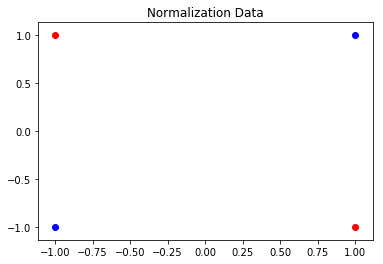

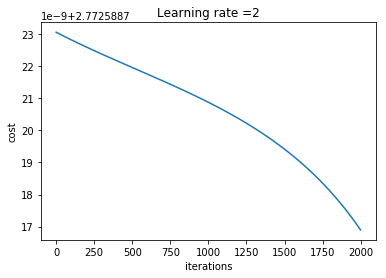

In [38]:
完整实例
if __name__ == "__main__":
    # X为横坐标，Y为纵坐标
    X = [0, 0, 1, 1]
    Y = [0, 1, 0, 1]
    label = [1, 0, 0, 1]
    # 第一类为蓝色，第二类为红色
    label_color = ['blue', 'red']
    color = []
    for i in label:
        if i == 1:
            color.append(label_color[0])
        else:
            color.append(label_color[1])
 
    # 数据归一化
    X = np.array(X)
    Y = np.array(Y)
    X = (X - np.average(X))
    Y = (Y - np.average(Y))
    X = X / X.max()
    Y = Y / Y.max()
    for i in range(len(X)):
        plt.scatter(X[i], Y[i], c=color[i])
    plt.title('Normalization Data')
    plt.show()
 
    data_X = np.vstack((X, Y))
    data_label = np.array([label])
 
    # 参数设置
    in_n = 2
    h_n = 3
    out_n = 1
    costs = []
    Y_prediction = []
    iters = 2000
    learning_rate = 2
    parameters = initialize_parameters(in_n, h_n, out_n)
 
    #开始训练
    for i in range(iters):
        # 前向传播
        A2, temp = forward_propagation(data_X, parameters)
        # 反向传播
        costTemp, gradients = backward_propagation(parameters, temp, data_X, data_label)
        costs.append(costTemp)
        # 参数更新
        parameters = update_parameters(parameters, gradients, learning_rate)
 
    # 预测
    Y_prediction = predict(parameters, data_X)
 
    #plot_decision_boundary(lambda x: predict(parameters, x.T), data_X, data_label)
    plt.show()
 
    # #画图
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()